In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aequilibrae import Project
import pandas as pd
import geopandas as gpd

In [3]:
from functions.raster_to_model import pop_to_model
from functions.check_population import check_pop

ImportError: DLL load failed while importing _base: The specified module could not be found.

## Model place (country) and population raster definition
(the raster must be in the same folder as this notebook)

In [4]:
model_place = 'Andorra'

## Loading project and getting country main area

In [5]:
model_fldr = f'../../{model_place}'

In [6]:
project = Project()
project.open(model_fldr)

## Processing the raster population information and inserts it into the model
(slow for large datasets)

In [7]:
pop_to_model(project, model_place)

AddGeometryColumn() error: "UNIQUE constraint failed: geometry_columns.f_table_name, geometry_columns.f_geometry_column"
CreateSpatialIndex() error: either "raw_population"."geometry" isn't a Geometry column or a SpatialIndex is already defined


## Comparing the total vectorized population to a World Bank source

In [8]:
check_pop(model_place, project)

,Total population
,
Vectorized from raster,"114,728"
World Bank source,"77,265"


# Population per subdivision

In [9]:
sql = "SELECT division_name, level, Hex(ST_AsBinary(GEOMETRY)) as geom FROM country_subdivisions;"
subdivisions = gpd.GeoDataFrame.from_postgis(sql, project.conn, geom_col="geom", crs=4326)
subdiv1 = subdivisions[subdivisions.level==1]
subdiv2 = subdivisions[subdivisions.level==2]

In [10]:
sql = "SELECT population, Hex(ST_AsBinary(GEOMETRY)) as geom FROM raw_population;"
pop = gpd.GeoDataFrame.from_postgis(sql, project.conn, geom_col="geom", crs=4326)

<AxesSubplot:>

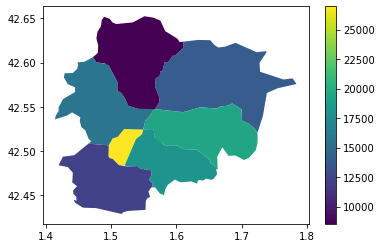

In [11]:
import matplotlib.pyplot as plt

data = gpd.sjoin(pop, subdiv1)
sum_pop = data.groupby(['division_name']).sum()[['population']].reset_index()
fig, ax = plt.subplots(1, 1)
plot_data = subdivisions.merge(sum_pop, on='division_name')
plot_data.plot(column='population', ax=ax, legend=True)

In [12]:
import matplotlib.pyplot as plt

if subdiv2.shape[0]:
    data = gpd.sjoin(pop, subdiv2)
    sum_pop = data.groupby(['division_name']).sum()[['population']].reset_index()
    fig, ax = plt.subplots(1, 1)
    plot_data = subdivisions.merge(sum_pop, on='division_name')
    plot_data.plot(column='population', ax=ax, legend=True)

In [13]:
project.close()